### Step A- Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step B- Importing or loading a Dataset and assigning it to a Variable

In [2]:
df = sns.load_dataset("Titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 10 BASIC EDA STEPS

### Step 1- Check the number of rows and columns (a.k.a observations and features)

In [3]:
rows,columns = df.shape
print("number of rows: {}".format(rows))
print("number of columns: {}".format(columns))

number of rows: 891
number of columns: 15


### Step 2- Data Structure

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


### Step 3- Find the missing values

In [5]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

##### Step 3.1- calculating the percentage of missing values

In [6]:
per_na = (df.isna().sum()/df.shape[0])*100
per_na

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

#### Step 3.2- removing missing values

In [7]:
df.age.fillna(df.age.mean(),inplace=True) # fillna with mean of age column
df.deck.fillna(df.deck.mode()[0],inplace=True) # fillna with mode of deck column because it has no numeric values we use mode() instead of mean()
df.embark_town.fillna(df.embark_town.mode()[0],inplace=True) # fillna with mode of embark_town column because it has no numeric values we use mode() instead of mean()
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### Step 4- Split variables / feature engineering

##### Above data doesnot need any modification so we will use another data to explain this step

In [8]:
people = pd.DataFrame({"Name":["Asif","Mary","Robert"], "City":["Lahore,Pakistan","Berlin,Germany","Beijing,China"],
                        "Age":["30","40","50"], "Salary":["10000","20000","30000"]})
people.head()

,Name,City,Age,Salary
0,Asif,"Lahore,Pakistan",30,10000
1,Mary,"Berlin,Germany",40,20000
2,Robert,"Beijing,China",50,30000


In [9]:
people[["City","Country"]] = people.City.str.split(",",expand=True)
people.head()

,Name,City,Age,Salary,Country
0,Asif,Lahore,30,10000,Pakistan
1,Mary,Berlin,40,20000,Germany
2,Robert,Beijing,50,30000,China


#### Step 5- Type Casting / Conversion

In [10]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     3 non-null      object
 1   City     3 non-null      object
 2   Age      3 non-null      object
 3   Salary   3 non-null      object
 4   Country  3 non-null      object
dtypes: object(5)
memory usage: 248.0+ bytes


In [11]:
#as we can see in the above dataframe Age and Salary are of type object. So we need to convert them to numeric type.
people[["Age","Salary"]] = people[["Age","Salary"]].astype("int64")
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     3 non-null      object
 1   City     3 non-null      object
 2   Age      3 non-null      int64 
 3   Salary   3 non-null      int64 
 4   Country  3 non-null      object
dtypes: int64(2), object(3)
memory usage: 248.0+ bytes


#### Step 6- Summary Statistics

In [12]:
df.describe() #describe gives the statistical summary of the dataframe numerical values.

#if we want to get the statistical summary of the categorical values, we can use the below method.
df.describe(include="all")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,889,891,891,891,891,891,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,747,646,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,13.002015,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,29.699118,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Step 7- Value_Counts / Unique Values

In [13]:
df.age.value_counts() #value_counts gives the count of the unique values in the column.

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: age, Length: 89, dtype: int64

In [14]:
#unique gives the unique values in the column.
df["class"].unique()

array(['Third', 'First', 'Second'], dtype=object)

In [15]:
df.age.nunique() #nunique gives the count of the unique values in the column.

89

#### Step 8- Dealing with the Duplicates Values

In [16]:
df.duplicated() #duplicated gives the boolean values of the duplicated rows.

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [17]:
# we can also check the sum of total duplicated rows.
df.duplicated().sum()

108

In [18]:
df.drop_duplicates(inplace=True) #drop_duplicates drops the duplicated rows

#row has been reduced from 891 to 784, but the index is not changed.
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.000000,0,5,29.1250,Q,Third,woman,False,C,Queenstown,no,False
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [19]:
df.reset_index(drop=True,inplace=True) #reset_index drops the index and creates a new index.
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,0,3,female,39.000000,0,5,29.1250,Q,Third,woman,False,C,Queenstown,no,False
779,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
780,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
781,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### Step 9- Check the Normality / Kurtosis / Skewness

##### Normality

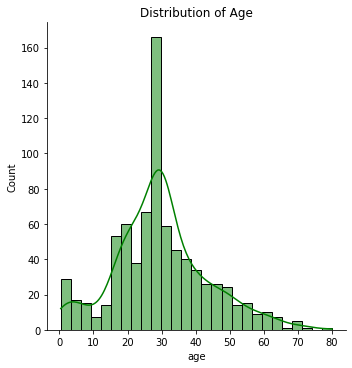

In [20]:
#sns.kdeplot(df.age) #kdeplot plots the kernel density estimate of the column.
sns.displot(df.age, kde=True, color= "green") #displot plots the distribution of the column.
plt.title("Distribution of Age")
plt.show()

c:\Users\waqas\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

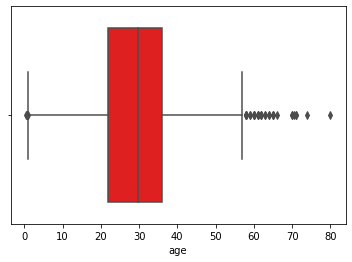

In [21]:
sns.boxplot(df.age, color="red") #boxplot plots the boxplot of the column.

##### Kurtosis and Skewness

In [22]:
df.age.agg(["skew","kurtosis"]) #agg gives the statistical summary of the column.

skew        0.396437
kurtosis    0.588533
Name: age, dtype: float64

#### Step 10- Correlation

In [23]:
df.corr() #corr gives the correlation between the columns.

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.334817,-0.078331,-0.037180,0.069818,0.246716,-0.528068,-0.175829
pclass,-0.334817,1.000000,-0.337997,0.087161,0.039432,-0.550261,0.068538,0.111368
age,-0.078331,-0.337997,1.000000,-0.280119,-0.187165,0.090261,0.274537,0.194029
sibsp,-0.037180,0.087161,-0.280119,1.000000,0.381225,0.135067,-0.274117,-0.609317
parch,0.069818,0.039432,-0.187165,0.381225,1.000000,0.191876,-0.346859,-0.570901
fare,0.246716,-0.550261,0.090261,0.135067,0.191876,1.000000,-0.165117,-0.246568
adult_male,-0.528068,0.068538,0.274537,-0.274117,-0.346859,-0.165117,1.000000,0.387265
alone,-0.175829,0.111368,0.194029,-0.609317,-0.570901,-0.246568,0.387265,1.000000


<AxesSubplot:>

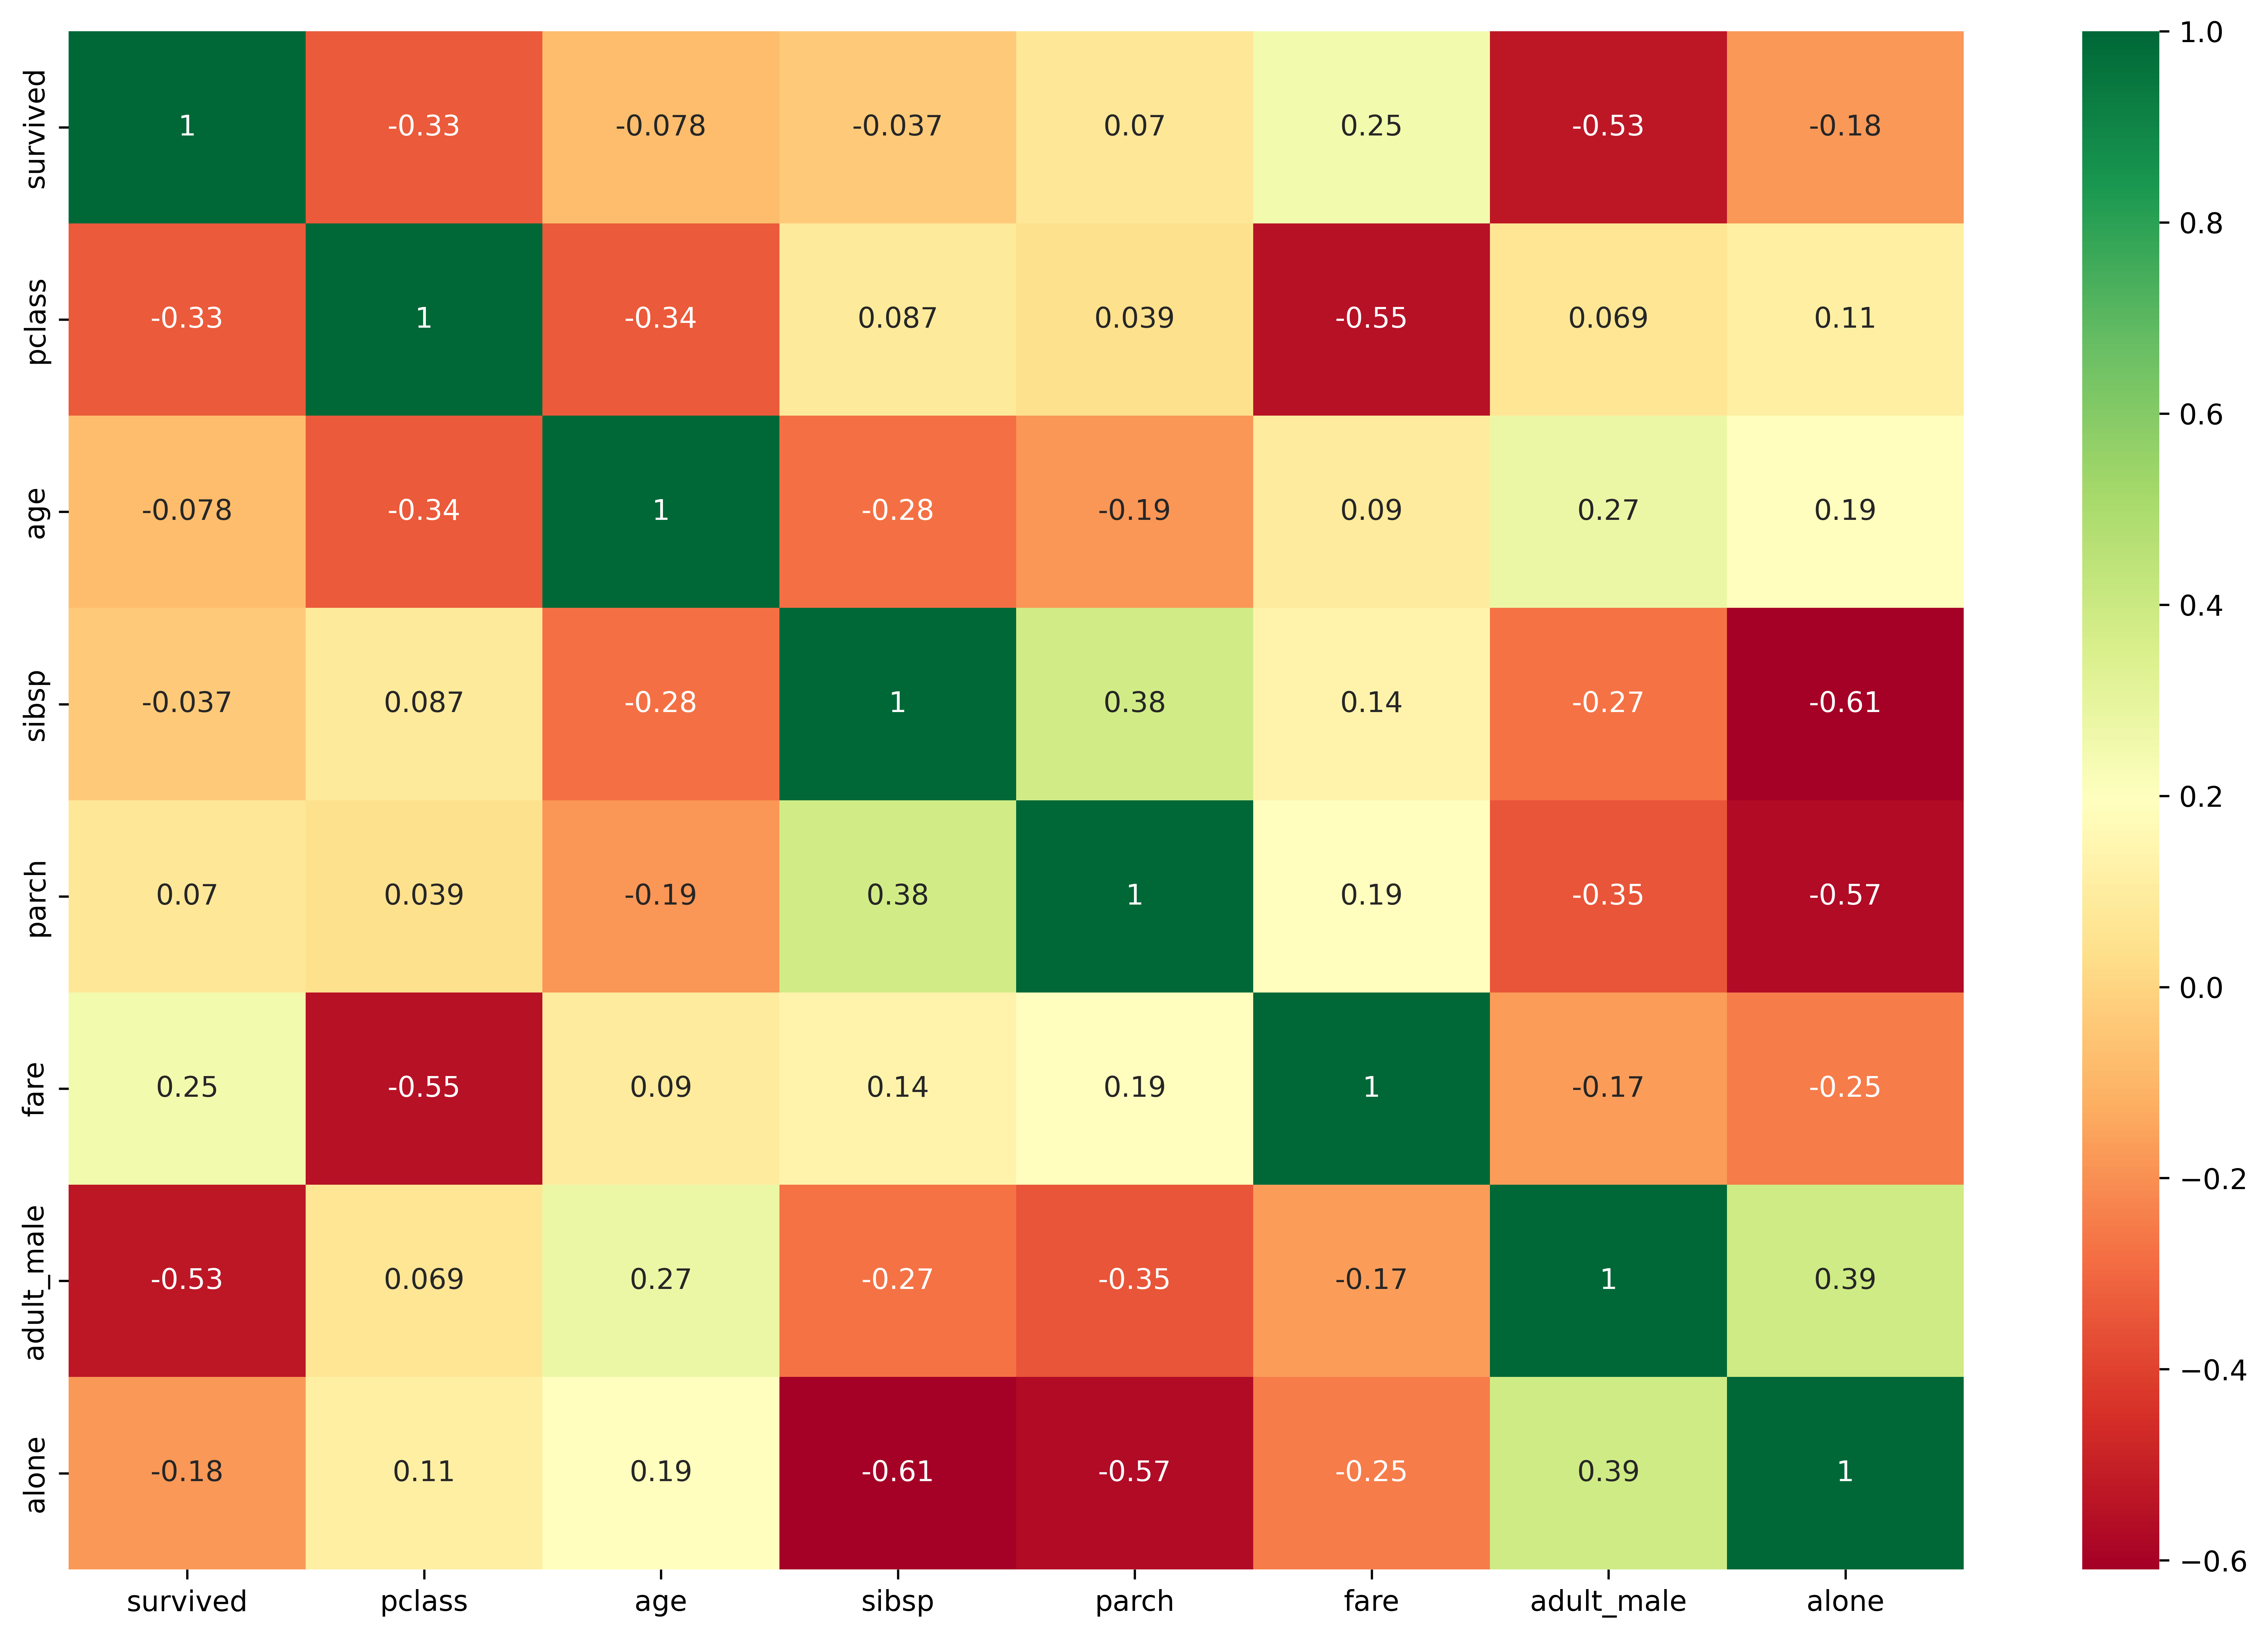

In [24]:
#we can also check the correlation between the columns using heatmap.
plt.figure(figsize=(15,10),dpi=600)
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

In [25]:
df.corr().style.background_gradient(cmap="RdYlGn")

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.334817,-0.078331,-0.037180,0.069818,0.246716,-0.528068,-0.175829
pclass,-0.334817,1.000000,-0.337997,0.087161,0.039432,-0.550261,0.068538,0.111368
age,-0.078331,-0.337997,1.000000,-0.280119,-0.187165,0.090261,0.274537,0.194029
sibsp,-0.037180,0.087161,-0.280119,1.000000,0.381225,0.135067,-0.274117,-0.609317
parch,0.069818,0.039432,-0.187165,0.381225,1.000000,0.191876,-0.346859,-0.570901
fare,0.246716,-0.550261,0.090261,0.135067,0.191876,1.000000,-0.165117,-0.246568
adult_male,-0.528068,0.068538,0.274537,-0.274117,-0.346859,-0.165117,1.000000,0.387265
alone,-0.175829,0.111368,0.194029,-0.609317,-0.570901,-0.246568,0.387265,1.000000


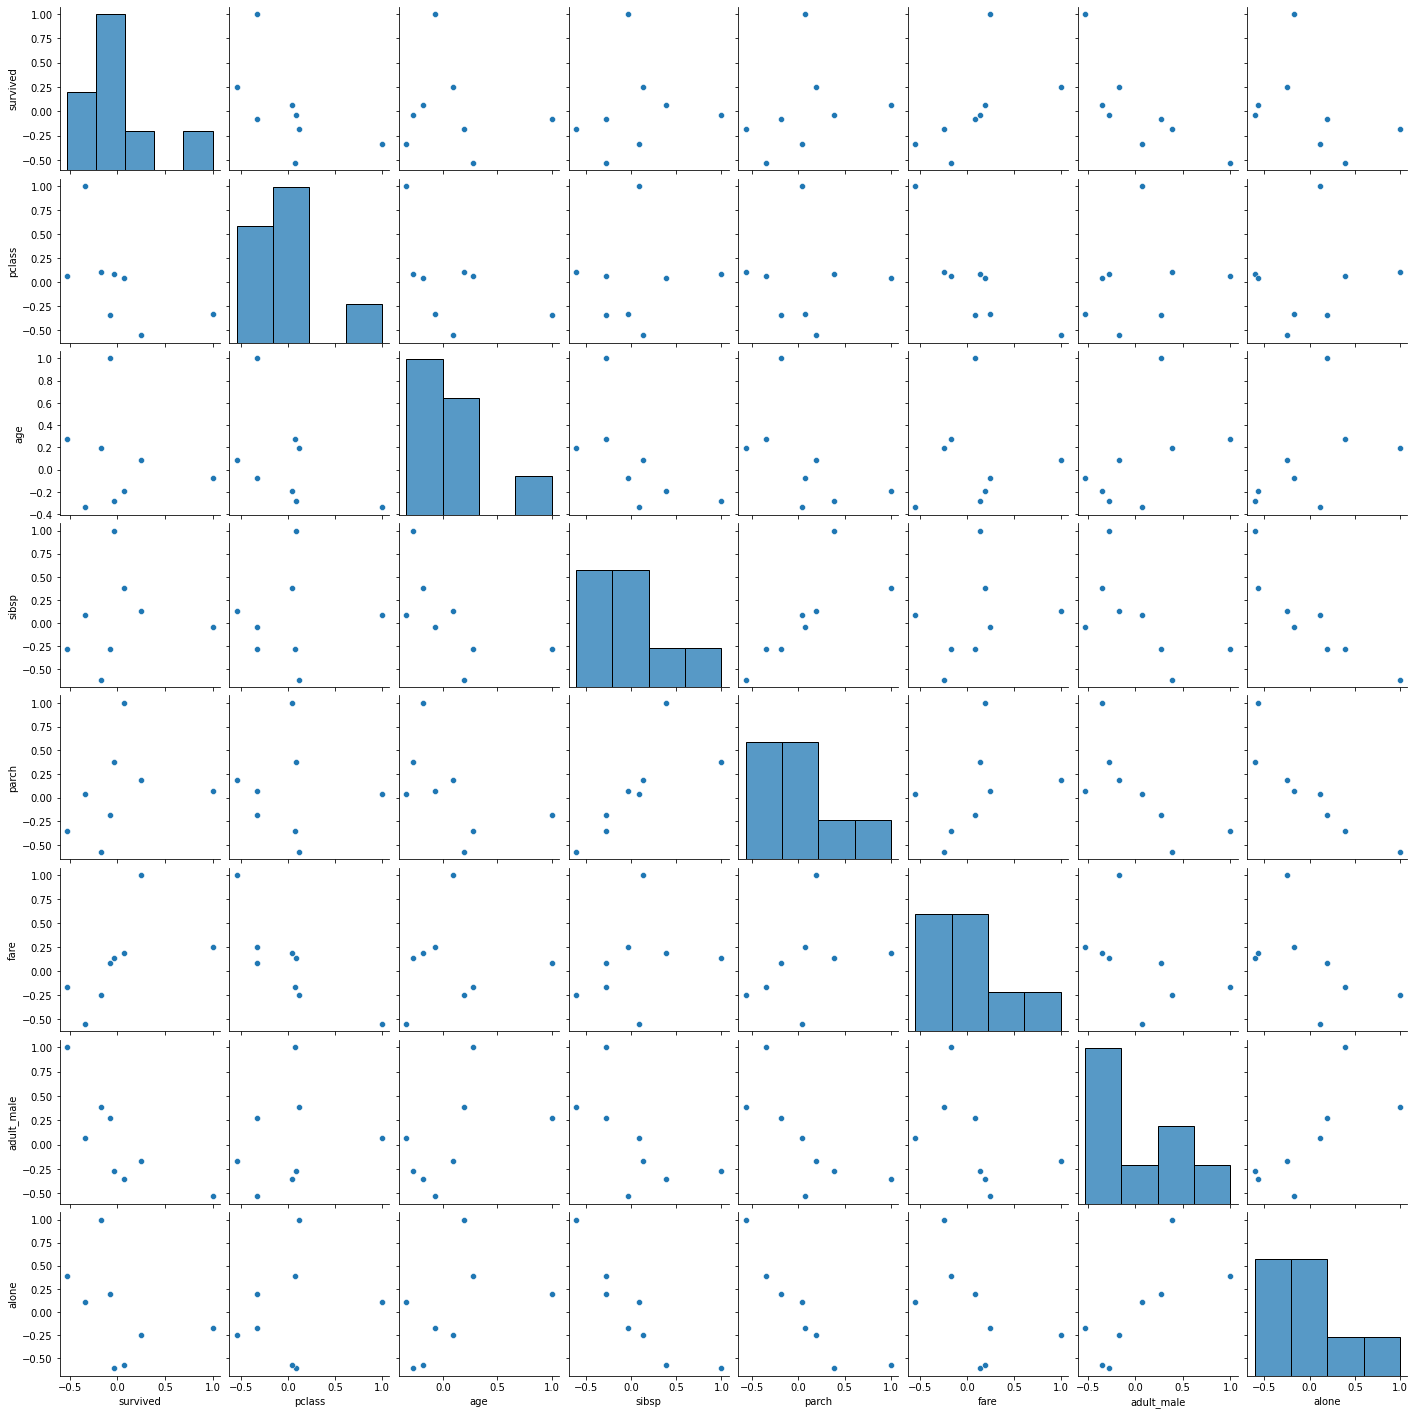

In [26]:
sns.pairplot(df.corr()) #pairplot plots the pairwise relationships between the columns.

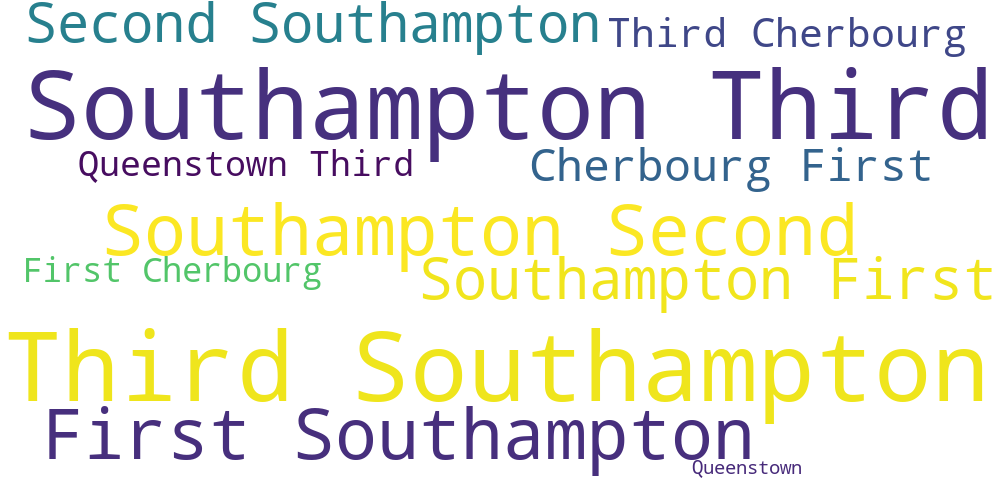

In [27]:
#word cloud can be used to visualize the words in the column.
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",width=1000,height=500).generate(" ".join(df[["embark_town","class"]].values.ravel()))
wordcloud.to_image()